In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import numpy as np
from numpy import log
from numpy import exp
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
#Task 1
volume = pd.DataFrame.from_csv('volume_per_year.csv')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  # Remove the CWD from sys.path while we load stuff.


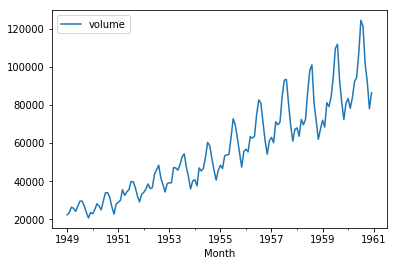

In [7]:
# Task 2A
volume.plot()
plt.show()

In [8]:
# Task 2B
# It seems that there is a periodicity in the volume with respect to time

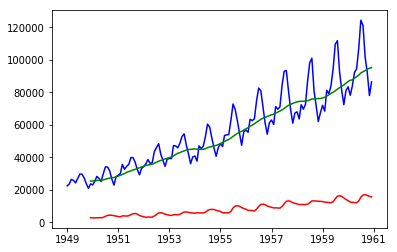

(0.81536887920619183, 0.99188024343764325, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.5787700591715979}, 2363.6588114084125)
Test Statistic:      0.815369
p-value:      0.991880
#Lags Used:      13.000000
Number of Observations Used      130.000000
Critical Value (1%)      -3.481682
Critical Value (10%      -2.578770
Critical Value (5%)      -2.884042


In [44]:
# Task 2C
ma = volume.rolling(window=12,center=False).mean()
msd = volume.rolling(window=12,center=False).std()
#msd = pd.rolling_std(volume,window=12,center=False)
plt.plot(volume,'blue')
plt.plot(ma,'green')
plt.plot(msd,'red')
plt.show()
# The moving average and moving deviation is increasing over year
adtestoutput = adfuller(volume.volume)
print('Test Statistic:      %.6f' % adtestoutput[0])
print('p-value:      %.6f' % adtestoutput[1])
print('#Lags Used:      %.6f' % adtestoutput[2])
print('Number of Observations Used      %.6f' % adtestoutput[3])
print('Critical Value (1%%)      %.6f' % adtestoutput[4]['1%'])
print('Critical Value (10%%      %.6f' % adtestoutput[4]['10%'])
print('Critical Value (5%%)      %.6f' % adtestoutput[4]['5%'])

In [ ]:
# What is the null hypothesis of the Dickey-Fuller test?
# In statistics, the Dickey–Fuller test tests the null hypothesis of 
# whether a unit root is present in an autoregressive model. 

# What do you conclude?
# We can conclude that this series is not stationary

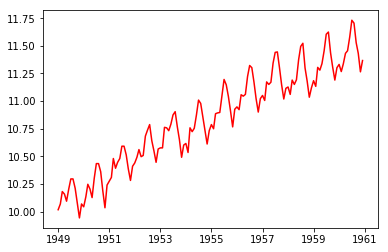

In [54]:
# Task 3A
logvolume = log(volume.volume)
plt.plot(logvolume,'red')
plt.show()
# Task 3B The plot of logvolume seems to have a constant amplitude comparing to volume

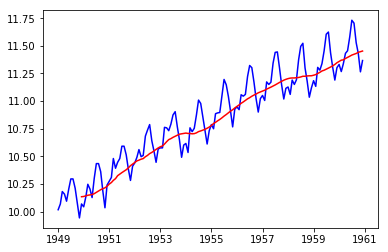

In [55]:
# Task 3C
mavolume = logvolume.rolling(window=12,center=False).mean()
plt.plot(logvolume,'blue')
plt.plot(mavolume,'red')
plt.show()

In [62]:
#Task 3D
volume_without_trend = logvolume - mavolume
adtestoutput2 = adfuller(volume_without_trend[11:])
print('Test Statistic:      %.6f' % adtestoutput2[0])
print('p-value:      %.6f' % adtestoutput2[1])
print('#Lags Used:      %.6f' % adtestoutput2[2])
print('Number of Observations Used      %.6f' % adtestoutput2[3])
print('Critical Value (1%%)      %.6f' % adtestoutput2[4]['1%'])
print('Critical Value (10%%      %.6f' % adtestoutput2[4]['10%'])
print('Critical Value (5%%)      %.6f' % adtestoutput2[4]['5%'])
# The series volume_without_trend is stationary with confidence level 95%

Test Statistic:      -3.162908
p-value:      0.022235
#Lags Used:      13.000000
Number of Observations Used      119.000000
Critical Value (1%)      -3.486535
Critical Value (10%      -2.579896
Critical Value (5%)      -2.886151


In [113]:
# Task 3E 3F
ewma = pd.ewma(logvolume,halflife=12)
volume_without_trend_ewma = logvolume - ewma
adtestoutput3 = adfuller(volume_without_trend_ewma)
print('Test Statistic:      %.6f' % adtestoutput3[0])
print('p-value:      %.6f' % adtestoutput3[1])
print('#Lags Used:      %.6f' % adtestoutput3[2])
print('Number of Observations Used      %.6f' % adtestoutput3[3])
print('Critical Value (1%%)      %.6f' % adtestoutput3[4]['1%'])
print('Critical Value (10%%      %.6f' % adtestoutput3[4]['10%'])
print('Critical Value (5%%)      %.6f' % adtestoutput3[4]['5%'])
#volume_without_trend_ewma is a stationary series
#This conclusion has a higher confidence level than the previous one
#It seems to be a better method

Test Statistic:      -3.601262
p-value:      0.005737
#Lags Used:      13.000000
Number of Observations Used      130.000000
Critical Value (1%)      -3.481682
Critical Value (10%      -2.578770
Critical Value (5%)      -2.884042


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
  


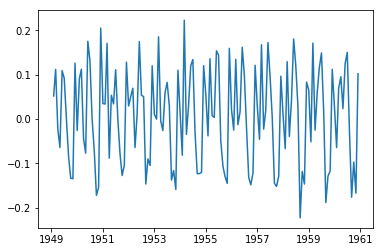

Test Statistic:      -2.717131
p-value:      0.071121
#Lags Used:      14.000000
Number of Observations Used      128.000000
Critical Value (1%)      -3.482501
Critical Value (10%      -2.578960
Critical Value (5%)      -2.884398


In [65]:
# Task 4
# A
dif_logvolume = logvolume - logvolume.shift(1)
dif_logvolume = dif_logvolume[1:]
# B
plt.plot(dif_logvolume)
plt.show()
# C
adtestoutput4 = adfuller(dif_logvolume)
print('Test Statistic:      %.6f' % adtestoutput4[0])
print('p-value:      %.6f' % adtestoutput4[1])
print('#Lags Used:      %.6f' % adtestoutput4[2])
print('Number of Observations Used      %.6f' % adtestoutput4[3])
print('Critical Value (1%%)      %.6f' % adtestoutput4[4]['1%'])
print('Critical Value (10%%      %.6f' % adtestoutput4[4]['10%'])
print('Critical Value (5%%)      %.6f' % adtestoutput4[4]['5%'])
# It is a stationary series, with confidence level 95%.

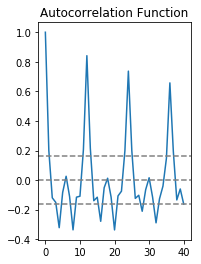

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


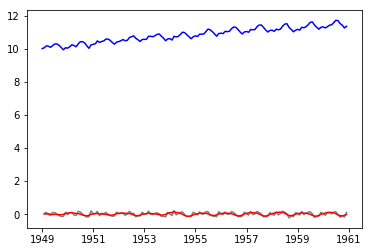

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64
Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [74]:
# Task 5
# A
acf_dif_logvolume = acf(dif_logvolume)
plt.subplot(121)
plt.plot(acf_dif_logvolume) 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(dif_logvolume)),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(dif_logvolume)),linestyle='--',color='gray') 
plt.title('Autocorrelation Function')  
plt.show()
# C
model = ARIMA(logvolume,order = (2,1,2))
# D
results_ARIMA = model.fit(disp = -1)
# E
plt.plot(logvolume,'blue')
plt.plot(dif_logvolume,'grey')
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.show()
# F
prediction_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues,copy = True)
print(prediction_ARIMA_diff.head())
prediction_ARIMA_diff_cumsum = prediction_ARIMA_diff.cumsum()
print(prediction_ARIMA_diff_cumsum.head())

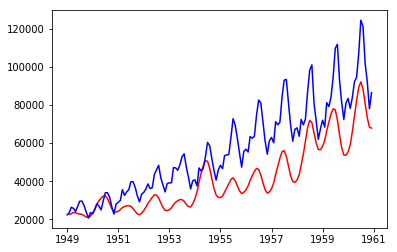

In [89]:
# G
pd.Series(prediction_ARIMA_diff_cumsum)
exp_ARIMA = exp(pd.Series(prediction_ARIMA_diff_cumsum)+logvolume[0])
plt.plot(exp_ARIMA,'red')
plt.plot(volume,'blue')
plt.show()